
Loading MNIST Data...

Loading Training Data...

Loading Testing Data...

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

KNN Trained Classifier Confidence:  0.9706666666666667

Predicted Values:  [3 6 0 ... 5 1 6]

Accuracy of Classifier on Validation Image Data:  0.9706666666666667

Confusion Matrix: 
 [[587   0   1   0   0   0   3   0   0   0]
 [  0 692   0   0   0   0   0   3   0   0]
 [  4   8 525   2   1   1   2   7   1   2]
 [  0   3   5 570   0   3   0   1   2   5]
 [  1   4   0   0 606   0   1   2   0   8]
 [  0   0   0   6   1 514   6   1   1   2]
 [  5   0   0   0   1   2 597   0   0   0]
 [  0   5   4   0   4   0   0 615   0   4]
 [  1   9   2   6   2  13   1   2 557   3]
 [  4   0   0   5   5   2   0 

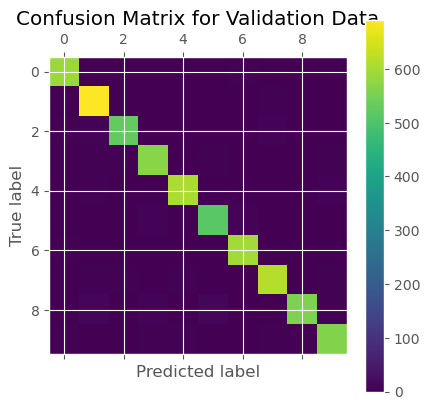


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9685

Confusion Matrix for Test Data: 
 [[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    9  990    2    0    0    1   16    3    0]
 [   0    3    3  975    1   12    1    8    4    3]
 [   2    7    0    0  942    0    4    3    1   23]
 [   5    0    0   11    2  864    5    1    2    2]
 [   6    3    0    0    3    2  944    0    0    0]
 [   0   25    3    0    2    0    0  988    0   10]
 [   7    3    5   15    7   11    3    4  914    5]
 [   6    6    3   10    5    1    1   12    2  963]]


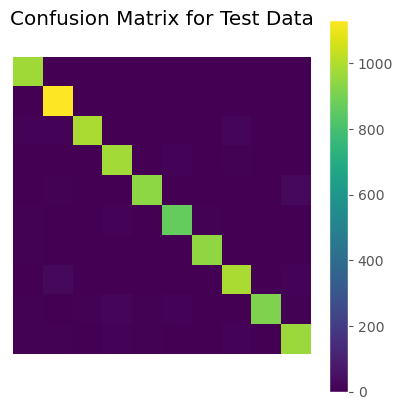

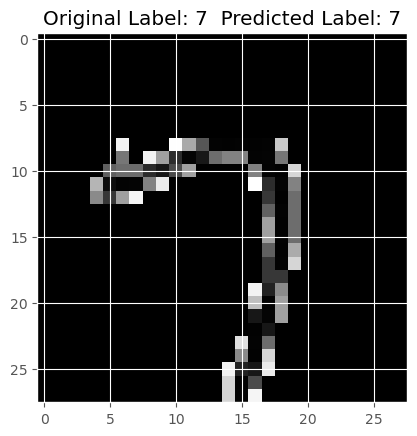

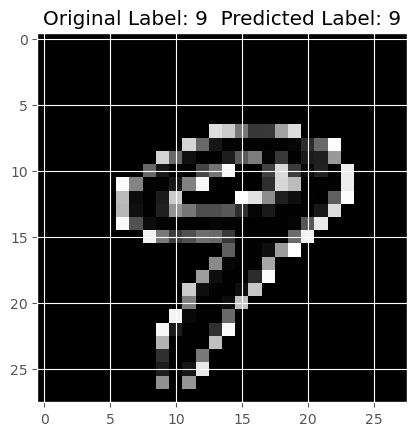

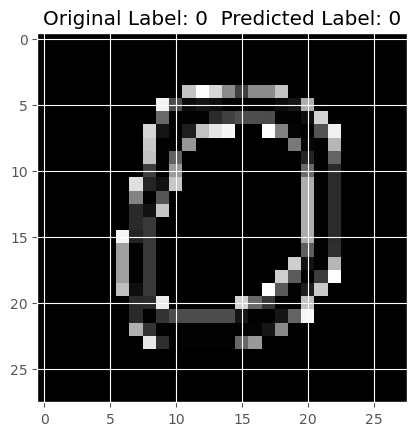

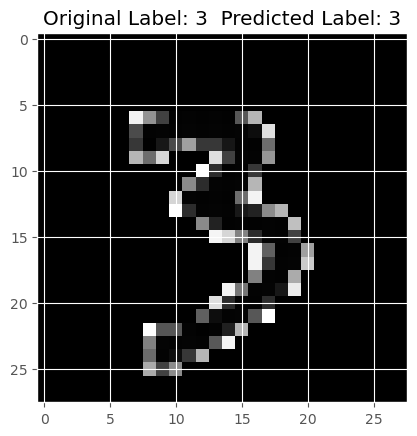

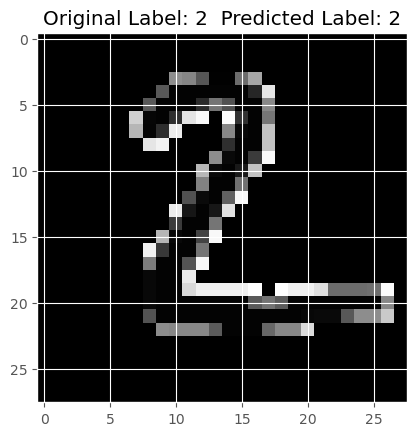

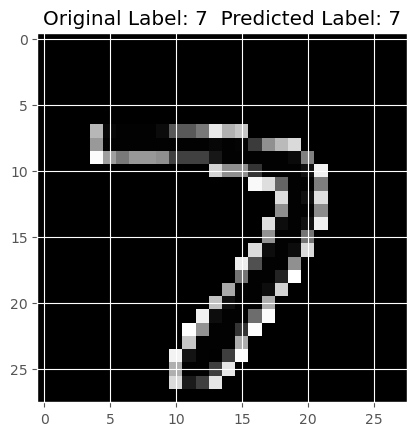

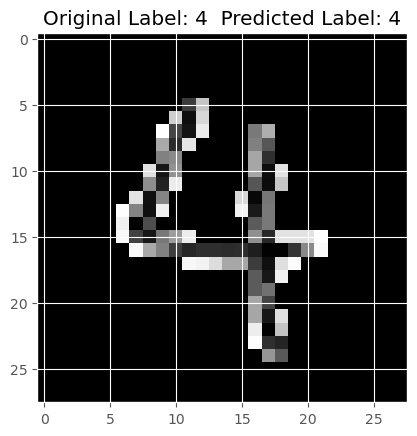

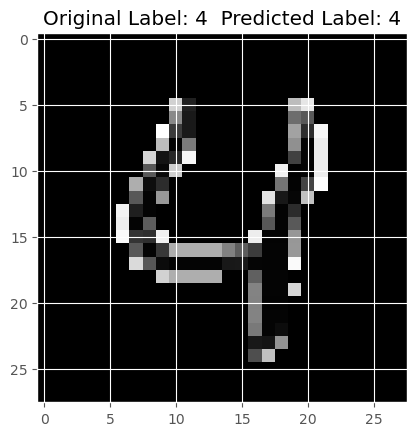

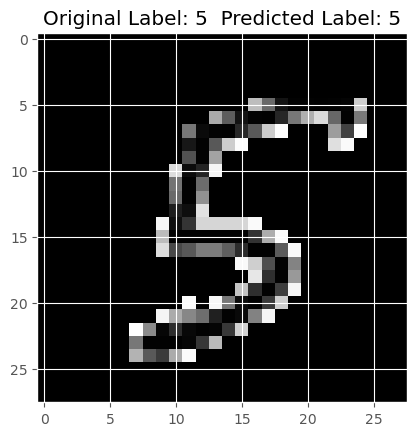

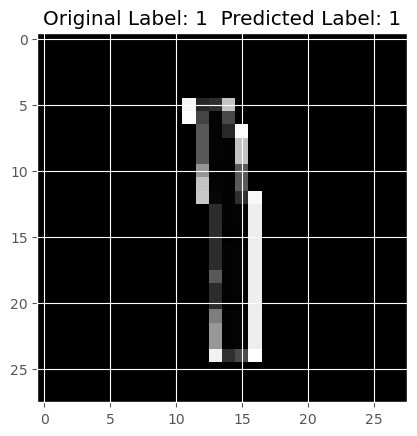

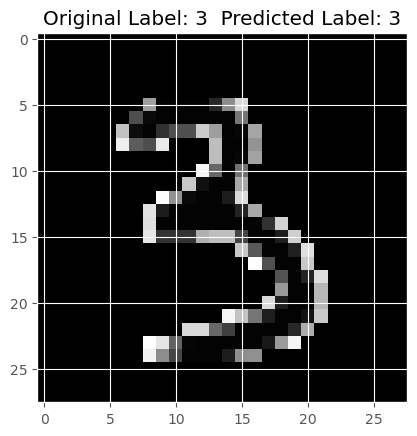

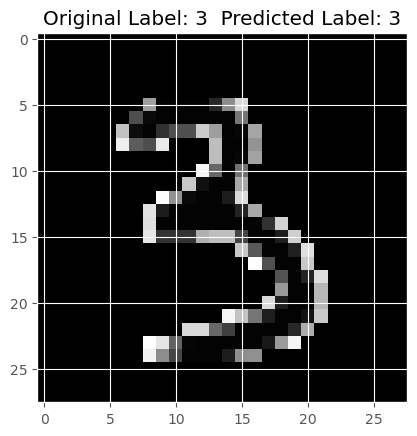

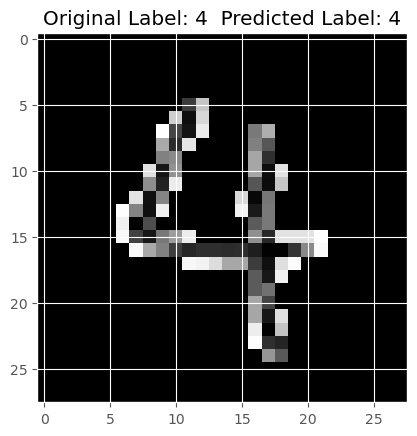

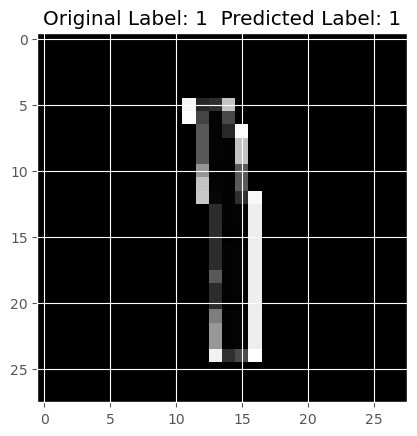

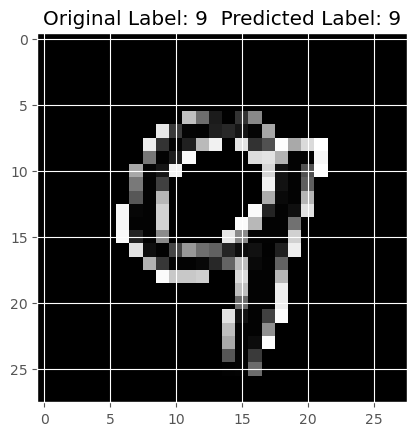

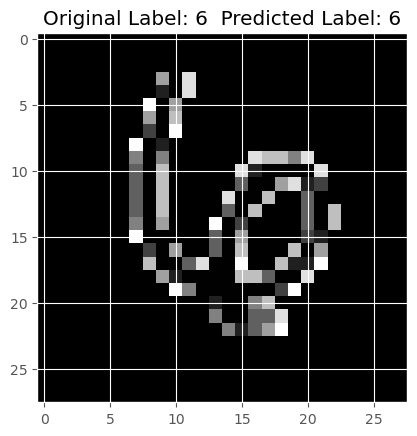

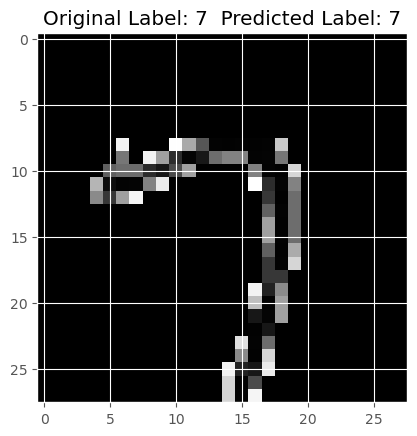

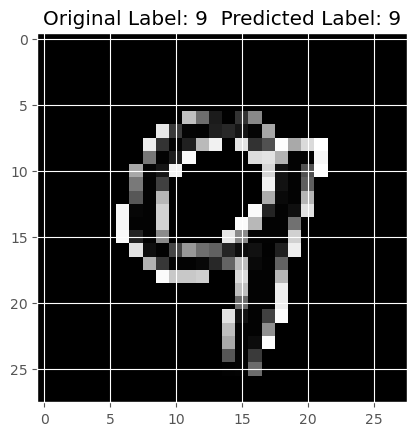

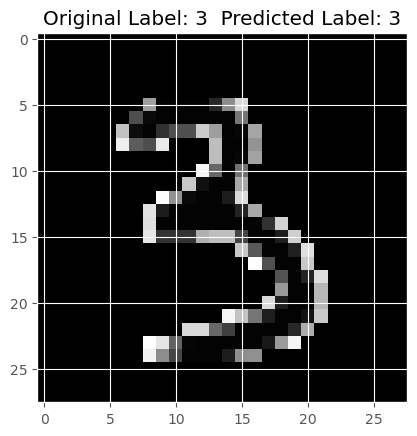

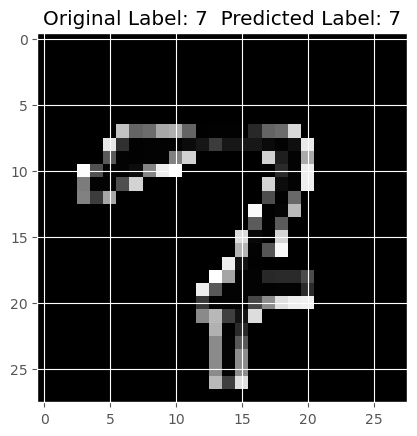

In [2]:
# K Nearest Neighbors

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



# old_stdout = sys.stdout
# log_file = open("summary.log","w")
# sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_KNN.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# sys.stdout = old_stdout
# log_file.close()



# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------
